# Classificação de músicas do Spotify 🎵.

## Sobre a base de dados:🎲
Este é um conjunto de dados de faixas do Spotify em uma variedade de 125 gêneros diferentes. Cada faixa possui alguns recursos de áudio associados a ela.

## Uso da base: 🛠️
O conjunto de dados pode ser usado para:

- Construindo um sistema de recomendação com base em alguma entrada ou preferência do usuário
- Finalidades de classificação com base em recursos de áudio e gêneros disponíveis
- Qualquer outro aplicativo que você possa imaginar. Sinta-se à vontade para discutir!
  
## Objetivo do nosso projeto:🎯
Este notebook contempla a criação de um **modelo preditivo para classificar músicas lentas e agitadas** utilizando a base de dados "Spotify Tracks Dataset" do Kaggle.

O link desta base e mais detalhes se encontra em:
https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

In [1]:
import pandas as pd

In [8]:
pd.set_option('display.max_column', None) #é a opção que controla o número máximo de colunas exibidas. -- O None significa que não há limite para o número de colunas exibidas.
data_frame = pd.read_csv('dataset.csv') #carrega os dados em um DataFrame do Pandas, que é uma estrutura de dados tabular, como uma tabela de banco de dados ou uma planilha de Excel.
data_frame.head() #exibe as 5 primeiras linhas. -- Se você quiser ver um número diferente de linhas, pode passar um número como argumento, por exemplo, df.head(10) para ver as 10 primeiras linhas.

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
data_frame.shape
#Primeiro valor: o número de linhas (observações ou registros).
#Segundo valor: o número de colunas (características ou variáveis).

(114000, 21)

# Criando a variável target🎯

De acordo com a regra de negócio, a coluna valence é uma medida de **0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa.** Faixas com **alta valência soam mais positivas** (por exemplo, feliz, alegre, eufórica), enquanto faixas com **baixa valência** soam mais negativas (por exemplo, triste, deprimida, irritada). Para criar a nossa coluna alvo do modelo preditivo, vamos utizar a coluna "valence" para ser nosso critério de músicas agitadas ou lentas.

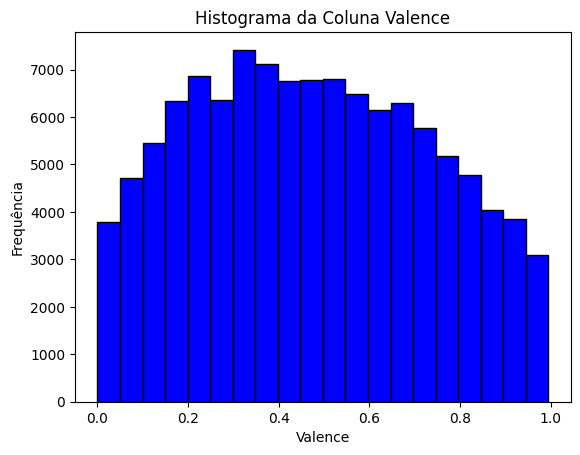

'\nplt.hist(data_frame[\'valence\'], bins=20, color=\'blue\', edgecolor=\'black\')\nCria um histograma a partir da coluna valence do DataFrame data_frame.\ndata_frame[\'valence\']: Seleciona a coluna valence do DataFrame, que, no contexto de análise de músicas, provavelmente representa a "valência", ou seja, o nível de positividade/emocionalidade de uma música (onde valores mais altos indicam músicas mais alegres).\nbins=20: Especifica que o histograma deve ter 20 intervalos (bins), ou seja, divide os dados da coluna valence em 20 partes (é a parte da barra).\ncolor=\'blue\': Define a cor das barras do histograma como azul.\nedgecolor=\'black\': Define a cor da borda das barras do histograma como preta.\n'

In [10]:
import matplotlib.pyplot as plt #criação de gráficos e visualizações de dados

#Analisando a coluna "valence" para criar a nossa target

plt.hist(data_frame['valence'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Valence') #Isso ajuda a identificar o que cada eixo representa. O eixo X estará mostrando os valores de valência das músicas.
plt.ylabel('Frequência') #Isso indica que o eixo Y representa a frequência (quantidade) de músicas com determinado valor de valência.
plt.title('Histograma da Coluna Valence') #O título fornece uma descrição do gráfico, ajudando a identificar o que está sendo visualizado.
plt.show()

"""
plt.hist(data_frame['valence'], bins=20, color='blue', edgecolor='black')
Cria um histograma a partir da coluna valence do DataFrame data_frame.
data_frame['valence']: Seleciona a coluna valence do DataFrame, que, no contexto de análise de músicas, provavelmente representa a "valência", ou seja, o nível de positividade/emocionalidade de uma música (onde valores mais altos indicam músicas mais alegres).
bins=20: Especifica que o histograma deve ter 20 intervalos (bins), ou seja, divide os dados da coluna valence em 20 partes (é a parte da barra).
color='blue': Define a cor das barras do histograma como azul.
edgecolor='black': Define a cor da borda das barras do histograma como preta.
"""

In [11]:
data_frame['valence'].describe()

,valence
count,114000.000000
mean,0.474068
std,0.259261
min,0.000000
25%,0.260000
50%,0.464000
75%,0.683000
max,0.995000


In [23]:
def categorizar_valence(linha):
  if linha['valence'] > 0.5: #recebe uma linha do DataFrame como entrada. Essa linha é um registro individual, ou seja, uma série de dados com várias informações sobre uma música.
    return "agitada"
  else:
    return "lenta"

# Crie a nova coluna 'target' usando a função categorizar_valence
data_frame['target'] = data_frame.apply(categorizar_valence, axis=1)
data_frame.head()

"""
data_frame['target'] = data_frame.apply(categorizar_valence, axis=1)

O que faz:
A função apply() é usada aqui para aplicar a função categorizar_valence a todas as linhas do DataFrame data_frame.

axis=1 indica que a aplicação será feita linha por linha. Ou seja, para cada linha do DataFrame, a função categorizar_valence será chamada, e a classificação (se "agitada" ou "lenta") será atribuída a essa linha.
O resultado da aplicação da função será armazenado na nova coluna chamada target. Ou seja, para cada música, será adicionada uma classificação ("agitada" ou "lenta") na coluna target.

Por que é útil:
Este passo cria a nova coluna target que contém a classificação de cada música com base na valência, facilitando a utilização desses rótulos (agitada ou lenta) para análise ou modelagem preditiva.
"""



,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,agitada
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,lenta
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,lenta
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,lenta
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,lenta


# Feature Engineering 🛠️
Como próximo passo, vamos armazenar em um novo dataframe apenas as colunas necessárias para nossa classificação de músicas.

In [13]:
data_frame.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'target'],
      dtype='object')

In [20]:
df_musica = data_frame.drop(['Unnamed: 0', 'track_id'], axis=1)
df_musica.head()

"""
O método drop() remove colunas ou linhas de um DataFrame.
O argumento ['Unnamed: 0', 'track_id'] indica que queremos remover essas duas colunas.
axis=1 indica que estamos removendo colunas (se fosse axis=0, estaríamos removendo linhas).

Por que remover essas colunas?

Unnamed: 0:
Muitas vezes, essa coluna aparece quando um CSV tem um índice salvo automaticamente.
É basicamente um número sequencial sem significado real, então removê-la evita informações desnecessárias.

track_id:
O ID da música (track_id) geralmente é um identificador único usado pelo Spotify.
Esse ID não traz informações úteis para análises estatísticas ou machine learning, porque é apenas um código único e não tem relação direta com as características da música.
Como estamos interessados nas propriedades acústicas das músicas (valence, danceability, energy, etc.), essa coluna não será útil para análise.
"""

"\nO método drop() remove colunas ou linhas de um DataFrame.\nO argumento ['Unnamed: 0', 'track_id'] indica que queremos remover essas duas colunas.\naxis=1 indica que estamos removendo colunas (se fosse axis=0, estaríamos removendo linhas).\n\nPor que remover essas colunas?\n\nUnnamed: 0:\nMuitas vezes, essa coluna aparece quando um CSV tem um índice salvo automaticamente.\nÉ basicamente um número sequencial sem significado real, então removê-la evita informações desnecessárias.\n\ntrack_id:\nO ID da música (track_id) geralmente é um identificador único usado pelo Spotify.\nEsse ID não traz informações úteis para análises estatísticas ou machine learning, porque é apenas um código único e não tem relação direta com as características da música.\nComo estamos interessados nas propriedades acústicas das músicas (valence, danceability, energy, etc.), essa coluna não será útil para análise.\n"

#Tratando os dados categóricos 🅰️
LabelEncoder: Essa classe é utilizada para codificar rótulos de classes em números inteiros. É frequentemente usado quando se trabalha com algoritmos de aprendizado supervisionado que requerem rótulos numéricos.

In [22]:
#Exemplo temos os cantores Olia Roderigo, Justin Bieber, Ariana Grande --> esses nomes irá ser substituido por números inteiros: 1,2,3
#One Hot Encoding outro exemplo
def label_encoder_dataframe(data_frame, columns_to_encode):
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()

  for column in columns_to_encode:
    if column in data_frame.columns: #verificando se cada coluna realmente existe no DataFrame.
      data_frame[column] = le.fit_transform(data_frame[column]) #os valores únicos da coluna e os substitui por números inteiros.
    else:
      print("A lista possui colunas que não existem no DataFrame")

  return data_frame
#Principal
colunas_a_codificar = ["artists", "album_name", "track_name", "explicit", "track_genre", "target"]
label_encoder_dataframe(df_musica, colunas_a_codificar)
df_musica.head()

"""
Para colunas como artists e track_genre, outra abordagem pode ser o One-Hot Encoding (pd.get_dummies()), que cria colunas binárias (0 ou 1) para cada categoria.

Se o número de categorias for muito grande, Label Encoding pode não ser a melhor escolha, pois modelos podem interpretar os números como ordinais (o que pode ser errado).
"""

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0,0
1,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0,1
2,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0,1
3,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0,1
4,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0,1


#Analisando as variáveis que vão compor nosso modelo 📊

'\nsns.heatmap() → Cria um mapa de calor para visualizar a matriz de correlação.\ndata=correlation_matrix → Usa a matriz de correlação calculada como base.\nannot=True → Mostra os valores de correlação dentro das células.\nlinewidths=.5 → Adiciona bordas de 0.5 de espessura entre as células.\nax=ax → Usa o eixo (ax) que criamos antes.\ncmap="coolwarm" → Define a paleta de cores:\nTons azuis → Correlação negativa.\nTons vermelhos → Correlação positiva.\nTons próximos de branco → Pouca ou nenhuma correlação.\n'

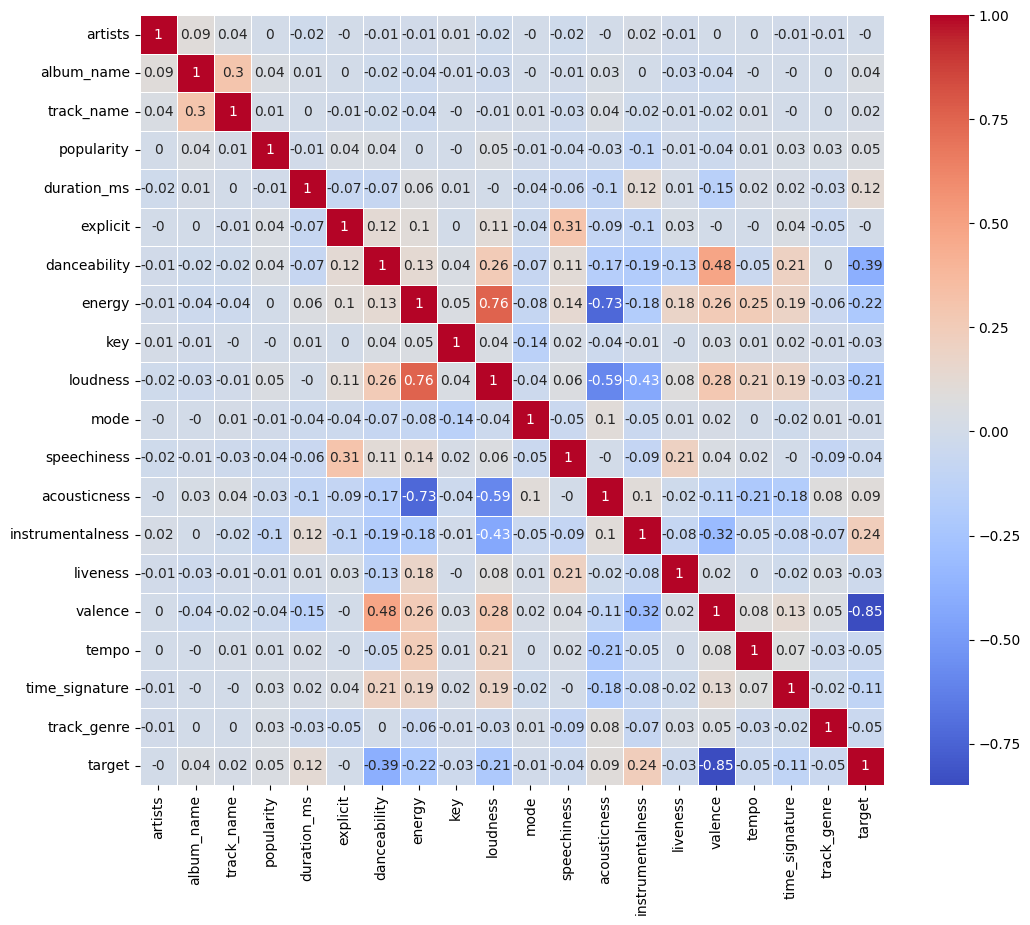

In [24]:
import seaborn as sns

correlation_matrix = df_musica.corr().round(2)

fig, ax = plt.subplots(figsize=(12,10)) #Cria uma figura (fig) e um eixo (ax) com um tamanho de 12x10 polegadas. Isso define o espaço onde o gráfico será desenhado.
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")
"""
sns.heatmap() → Cria um mapa de calor para visualizar a matriz de correlação.
data=correlation_matrix → Usa a matriz de correlação calculada como base.
annot=True → Mostra os valores de correlação dentro das células.
linewidths=.5 → Adiciona bordas de 0.5 de espessura entre as células.
ax=ax → Usa o eixo (ax) que criamos antes.
cmap="coolwarm" → Define a paleta de cores:
Tons azuis → Correlação negativa.
Tons vermelhos → Correlação positiva.
Tons próximos de branco → Pouca ou nenhuma correlação.
"""
#energy e loudness com correlação 0.85 → Significa que músicas mais energéticas tendem a ser mais altas.
#valence e tempo com correlação -0.2 → Pouca relação entre o ritmo e o tom emocional da música.

#Entendendo o equilíbrio da target 🎯

In [26]:
#Verificando o equilíbrio das classes
round(df_musica['target'].value_counts(normalize=True)*100,2)
"""
Em problemas de classificação, como separar músicas lentas e agitadas, é importante verificar se há um desequilíbrio entre as classes.

🔴 Problema do desequilíbrio:
Se tivermos 90% das músicas classificadas como "agitadas" e apenas 10% como "lentas", um modelo poderia simplesmente prever tudo como "agitado" e ainda ter 90% de acurácia, mas sem realmente aprender a diferenciar as classes.

✅ Solução:
Se houver desequilíbrio, podemos tentar:

Aumentar o conjunto menor → Oversampling (SMOTE, duplicação de dados).
Reduzir o conjunto maior → Undersampling (remover alguns exemplos da classe dominante).
Usar pesos na classificação → Ajustar o modelo para dar mais importância à classe menor.

"""

,proportion
target,
1,54.37
0,45.63


In [31]:
set(data_frame["target"])

{'agitada', 'lenta'}

In [32]:
set(df_musica["target"])

{0, 1}

#Separando os dados em treino e teste 🔄

In [27]:
df_musica.columns

Index(['artists', 'album_name', 'track_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'target'],
      dtype='object')

In [34]:
# Separando os dados em treino e teste (método hold out)

from sklearn.model_selection import train_test_split

#X = df_musica.drop('target', axis=1)
X = df_musica[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'track_genre']]
y = df_musica['target']

"""
Aqui estamos separando as features (X) e o rótulo (y):

X: contém as variáveis que serão usadas para prever a categoria (música lenta ou agitada).
y: é a variável-alvo que queremos prever (se a música é "agitada" ou "lenta").
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

"""
Aqui estamos separando os dados em treino e teste:

test_size=0.2: 20% dos dados vão para o teste e 80% para o treino.
stratify=y: Mantém o equilíbrio das classes (evita que o conjunto de treino fique com mais músicas agitadas ou lentas do que no conjunto original).
random_state=7: Garante que a divisão seja sempre a mesma (para reprodutibilidade dos resultados).

"""

"""
Quando treinamos um modelo, precisamos garantir que ele aprenda padrões gerais e não apenas memorize os dados de treino. Para isso:

✅ Treinamos o modelo em um conjunto de dados (X_train, y_train).
✅ Testamos em um conjunto separado (X_test, y_test) para verificar o quão bem ele generaliza.

Se não fizermos isso, o modelo pode parecer perfeito nos dados de treino, mas falhar ao lidar com novos dados no mundo real (overfitting).
"""

In [35]:
print(X_train.shape, X_test.shape)

(91200, 9) (22800, 9)


#Normalizando os dados 📏
Ao aplicar o MinMaxScaler, todos os valores dos dados serão transformados para o intervalo entre 0 e 1, onde o valor mínimo será 0 e o valor máximo será 1. Essa técnica é especialmente útil quando os algoritmos de aprendizado de máquina são sensíveis à escala dos dados.

Por que aplicamos a normalização dos dados com as bases já separadas em treino e teste? 🤔 Se aplicarmos normalizações antes de dividir em conjuntos de treino e teste, podemos acabar introduzindo informações do conjunto de teste no conjunto de treino. Isso pode levar a uma avaliação otimista do desempenho do modelo, uma vez que o modelo terá visto parte dos dados de teste durante o treinamento. Este tipo de problema também é chamado de **Data Leak (vazamento de dados).**

In [37]:
from sklearn.preprocessing import MinMaxScaler

# Criar uma instância do MinMaxScaler
scaler = MinMaxScaler() #Criamos um objeto scaler que será usado para transformar os dados.

scaler.fit(X_train) # aqui falar sobre data leak || Aqui o scaler aprende os valores mínimos e máximos das features do conjunto de treino.

#Agora, aplicamos a transformação nos dados de treino e teste usando os valores mínimos e máximos que foram aprendidos no conjunto de treino.
X_train_escalonado = scaler.transform(X_train)
X_test_escalonado = scaler.transform(X_test)

"""
Data leakage (vazamento de dados) acontece quando usamos informações do conjunto de teste durante o treinamento.
Isso pode fazer o modelo parecer mais preciso do que realmente é, pois ele "aprendeu" com dados que deveria apenas prever.

🔴 Se tivéssemos feito scaler.fit(X) antes de dividir os dados, estaríamos permitindo que o modelo "visse" os dados de teste antes da hora.
Isso estragaria a validação e daria resultados enganosos.

✅ A solução correta:

Fazemos o fit() apenas no conjunto de treino.
Usamos apenas transform() no conjunto de teste.
"""


#Criando uma função para executar modelos de machine learning 🚀
Vamos criar uma função que vai executar o modelo preditivo e avaliar a sua performance utilizando as principais métricas de validação.

In [40]:
def roda_modelo(modelo):

    from sklearn.metrics import roc_curve, roc_auc_score, classification_report

    # Treinando modelo com os dados de treino
    modelo.fit(X_train_escalonado, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(X_test_escalonado) # obter as probabilidades associadas às classes previstas para cada instância de dados
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(X_test_escalonado)
    print("\nClassification Report")
    print(classification_report(y_test, predicao))

    print("\nRoc Curve\n")
    # Fazer previsões de probabilidades
    y_pred_probs = modelo.predict_proba(X_test_escalonado)[:, 1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    # Calcular a AUC (área sob a curva ROC)
    auc = roc_auc_score(y_test, y_pred_probs)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})') # linewidth
    plt.plot([0, 1], [0, 1], color='gray',linestyle='--')
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Converter probabilidades em classes preditas (0 ou 1)
    y_pred = (y_pred_probs > 0.5).astype(int)


#Regressão logística
O modelo se baseia em uma função logística, que transforma as variáveis independentes em uma probabilidade entre 0 e 1. Para novas entradas de dados, o modelo calcula a probabilidade do evento binário ocorrer.

AUC 0.7962019382303666

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.69      0.69     10403
           1       0.74      0.75      0.75     12397

    accuracy                           0.72     22800
   macro avg       0.72      0.72      0.72     22800
weighted avg       0.72      0.72      0.72     22800


Roc Curve



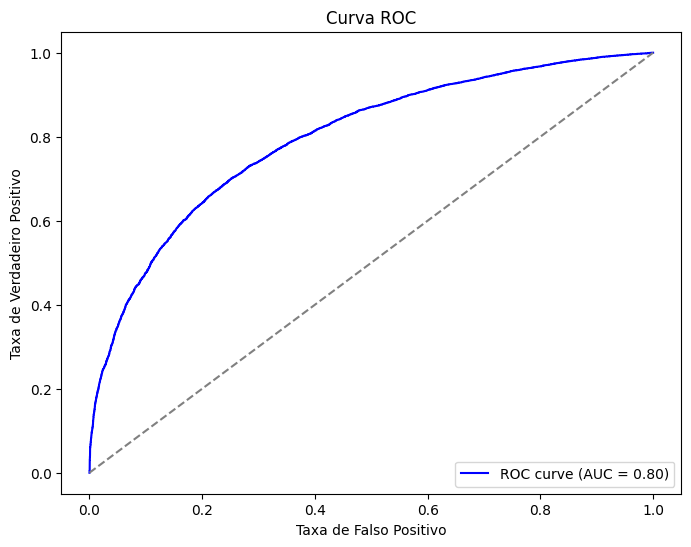

In [41]:
from sklearn.linear_model import LogisticRegression
modelo_logistico = LogisticRegression()
roda_modelo(modelo_logistico)

#KNN (K-Nearest Neighbors)
Para um novo ponto de dados, o KNN identifica os K pontos mais próximos (vizinhos) no conjunto de treinamento. A classe do novo ponto é a classe mais frequente entre os K vizinhos.

AUC 0.8117874424738845

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     10403
           1       0.77      0.78      0.78     12397

    accuracy                           0.75     22800
   macro avg       0.75      0.75      0.75     22800
weighted avg       0.75      0.75      0.75     22800


Roc Curve



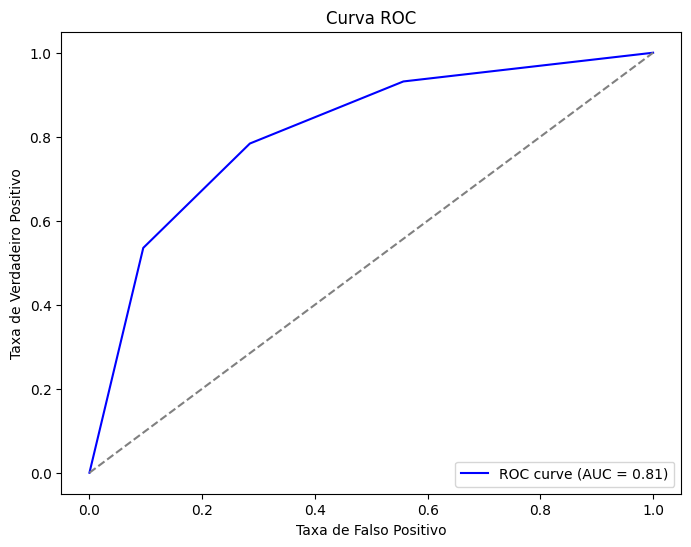

In [42]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knm = KNeighborsClassifier(n_neighbors=3)
roda_modelo(modelo_knm)

#Random Florest
O Random Forest Classifier é um algoritmo de ensemble learning, que combina vários modelos para melhorar a performance. O modelo cria uma floresta de árvores de decisão, onde cada árvore é treinada em um subconjunto aleatório dos dados (bootstrap). A classe final do novo ponto de dados é a classe mais votada pelas árvores da floresta.



AUC 0.8296047676631276

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.71      0.72     10403
           1       0.76      0.77      0.77     12397

    accuracy                           0.75     22800
   macro avg       0.74      0.74      0.74     22800
weighted avg       0.74      0.75      0.74     22800


Roc Curve



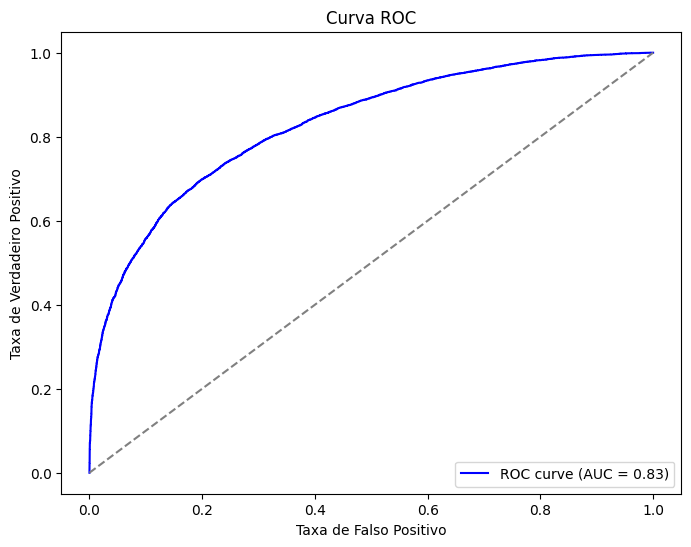

In [43]:

from sklearn.ensemble import RandomForestClassifier
modelo_random_forest = RandomForestClassifier(max_depth=7, n_estimators= 100)
roda_modelo(modelo_random_forest)

#Testando novos parâmetros com Grid Search
Ess teste pode demorar um pouquinho!

In [44]:

from sklearn.model_selection import GridSearchCV

# Defina os parâmetros a serem testados
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 15]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=1)

# Ajuste o modelo ao conjunto de dados
grid_search.fit(X_train_escalonado, y_train)

rf_params = grid_search.best_params_
print("Melhores hiperparâmetros:", rf_params)

Melhores hiperparâmetros: {'max_depth': 15, 'n_estimators': 300}


Melhores hiperparâmetros: {'max_depth': 15, 'n_estimators': 300}

Testando com os melhores parametros encontrados.

AUC 0.9060269307743309

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80     10403
           1       0.84      0.84      0.84     12397

    accuracy                           0.82     22800
   macro avg       0.82      0.82      0.82     22800
weighted avg       0.82      0.82      0.82     22800


Roc Curve



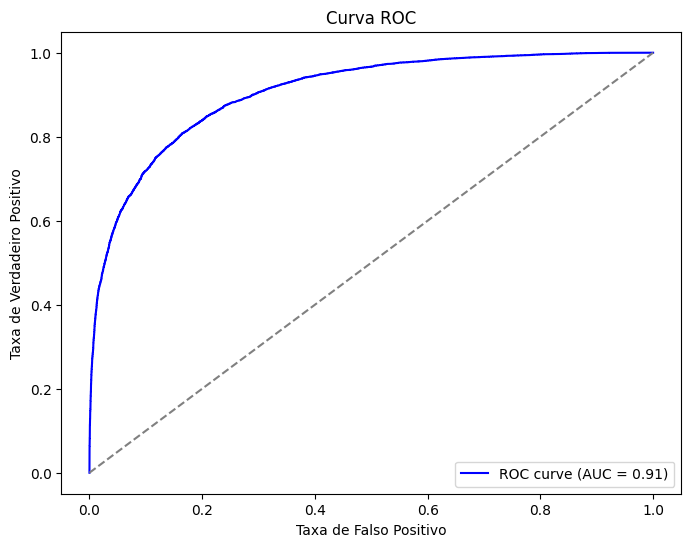

In [45]:
from sklearn.ensemble import RandomForestClassifier
modelo_random_forest_gs = RandomForestClassifier(max_depth=15, n_estimators= 300)
roda_modelo(modelo_random_forest_gs)

#Testando o modelo 😊

In [46]:
import numpy as np

novos_dados = pd.read_excel("novos_dados.xlsx")
base_original = pd.read_excel("novos_dados.xlsx")

#Criando a pipeline
coluna = ['track_genre']
label_encoder_dataframe(novos_dados, coluna)
novos_dados = scaler.transform(novos_dados)

# Realize a previsão usando o modelo Random Forest treinado
previsoes = modelo_random_forest_gs.predict(novos_dados)

# Obtendo o predict
def mapear_valor(valores):
    resultados = []
    for valor in valores:
        if valor == 0:
            resultados.append('Música agitada')
        elif valor == 1:
            resultados.append('Música lenta')
        else:
            resultados.append('Desconhecido')
    return np.array(resultados)

base_original['target'] = mapear_valor(previsoes)
base_original.head()

,popularity,duration_ms,danceability,energy,loudness,acousticness,instrumentalness,liveness,track_genre,target
0,80,200000,0.89,0.8,-19333,0.0555,0.976,0.45,rock,Música agitada
1,30,205000,0.20,0.5,-11773,0.0100,0.452,0.20,folk,Música lenta
